In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [96]:
#both datasets are cleaned and unwanted rows are dropped
#both datasets are combined to one dataset called amzn
#using pandas products, discount price and difference in discount price are evaluated in one dataset
#onehot encoding, cosine similarity, tfidfvectoization , countvectorizer are used
# cosine similarity between input from user and name of products from amazon dataset and flipkart dataset are evaluted rowwise. 
# minimum value from these cosine similarity is considered and index of that minimum value product is displayed from both dataset
# according to that discount price is displayed. this is done by displaying whole row from newly created dataset by pandas(i.e, amzn)

In [2]:
amzn = pd.read_csv("amz_com-ecommerce_sample.csv",encoding= 'unicode_escape')
amzn.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,982,438,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32143,29121,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,991,551,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,694,325,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,208,258,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [3]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   uniq_id                  20000 non-null  object
 1   crawl_timestamp          20000 non-null  object
 2   product_url              20000 non-null  object
 3   product_name             20000 non-null  object
 4   product_category_tree    20000 non-null  object
 5   pid                      20000 non-null  object
 6   retail_price             20000 non-null  int64 
 7   discounted_price         20000 non-null  int64 
 8   image                    19997 non-null  object
 9   is_FK_Advantage_product  20000 non-null  bool  
 10  description              19998 non-null  object
 11  product_rating           20000 non-null  object
 12  overall_rating           20000 non-null  object
 13  brand                    14136 non-null  object
 14  product_specifications   19986 non-nul

In [4]:
amzn.shape

(20000, 15)

In [5]:
amzn.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                  0
discounted_price              0
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [6]:
amzn = amzn.drop(['brand'],axis = 1)
amzn.shape

(20000, 14)

In [7]:
amzn = amzn.dropna(axis = 0)
amzn.shape

(19981, 14)

<AxesSubplot:>

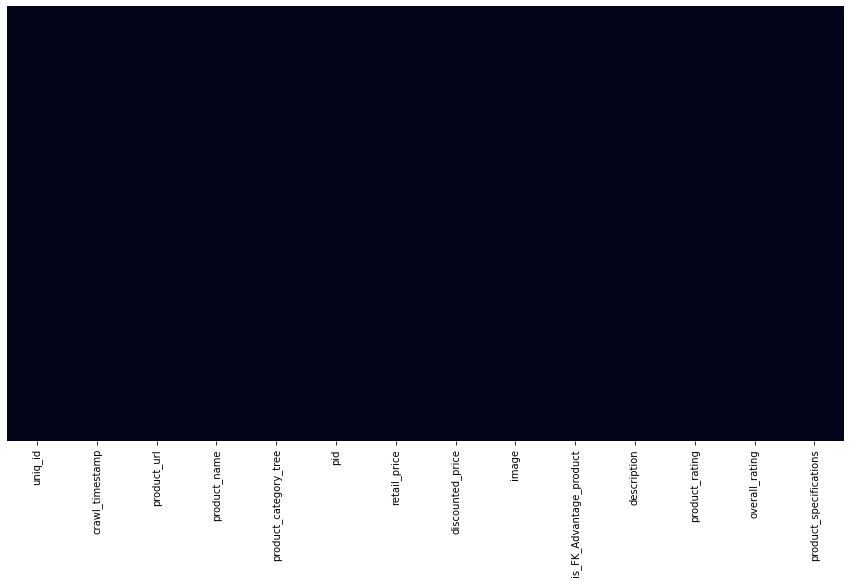

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(amzn.isnull(),cbar=False,yticklabels=False)

In [9]:
fk = pd.read_csv("flipkart_com-ecommerce_sample.csv",encoding= 'unicode_escape')
fk.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [10]:
fk.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [11]:
fk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [12]:
amzn = amzn.drop(['description','product_rating','overall_rating','product_specifications'],axis=1)

In [13]:
amzn.shape

(19981, 10)

In [14]:
amzn = amzn.drop(['uniq_id','crawl_timestamp','product_url','pid','image','is_FK_Advantage_product'],axis = 1)

In [15]:
amzn.head()

,product_name,product_category_tree,retail_price,discounted_price
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",982,438
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32143,29121
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",991,551
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",694,325
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",208,258


In [16]:
mean_value = fk['retail_price'].mean()

In [17]:
mean_value_1 = fk['discounted_price'].mean()

In [18]:
fk['discounted_price'].fillna(value=mean_value_1, inplace=True)

In [19]:
fk['retail_price'].fillna(value=mean_value, inplace=True)

In [20]:
fk = fk.drop(['brand'],axis = 1)
fk.shape

(20000, 14)

In [21]:
fk = fk.dropna(axis = 0)
fk.shape

(19981, 14)

In [22]:
fk = fk.drop(['description','product_rating','overall_rating','product_specifications'],axis=1)

In [23]:
fk = fk.drop(['uniq_id','crawl_timestamp','product_url','pid','image','is_FK_Advantage_product'],axis = 1)

<AxesSubplot:>

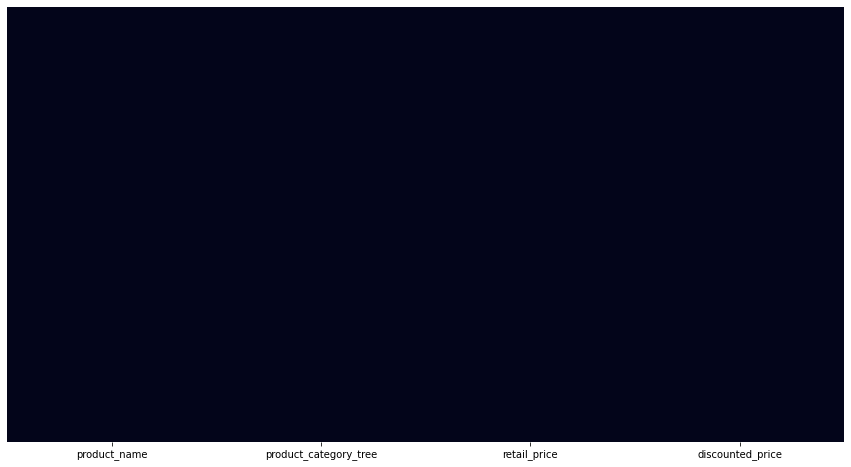

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(fk.isnull(),cbar=False,yticklabels=False)

In [25]:
fk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19981 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_name           19981 non-null  object 
 1   product_category_tree  19981 non-null  object 
 2   retail_price           19981 non-null  float64
 3   discounted_price       19981 non-null  float64
dtypes: float64(2), object(2)
memory usage: 780.5+ KB


In [26]:
fk['retail_price'] = fk['retail_price'].astype(int)
fk['discounted_price'] = fk['discounted_price'].astype(int)

In [27]:
fk.head()

,product_name,product_category_tree,retail_price,discounted_price
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999,379
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157,22646
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999,499
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699,267
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220,210


In [28]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
amzn_1_hot = cat_encoder.fit_transform(amzn[['product_name']])
amzn_1_hot

<19981x12721 sparse matrix of type '<class 'numpy.float64'>'
	with 19981 stored elements in Compressed Sparse Row format>

In [29]:
n = amzn_1_hot.toarray()

In [30]:
amzn_1_hot_T = np.transpose(amzn_1_hot)
amzn_1_hot_T.shape

(12721, 19981)

In [31]:
cat_encoder = OneHotEncoder()
fk_1_hot = cat_encoder.fit_transform(fk[['product_name']])
fk_1_hot

<19981x12664 sparse matrix of type '<class 'numpy.float64'>'
	with 19981 stored elements in Compressed Sparse Row format>

In [32]:
fk_1_hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
fk_1_hot_T = np.transpose(fk_1_hot)
fk_1_hot_T.shape

(12664, 19981)

In [34]:
amzn_1_hot_T.shape

(12721, 19981)

In [35]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(amzn_1_hot_T,fk_1_hot_T)

print(similarity)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [36]:
amzn['Discounted_price_fk'] = fk['discounted_price']
amzn['products_match'] = np.where(amzn['product_name'] == fk['product_name'], 'True', 'False')
amzn['price_difference'] = np.where(amzn['discounted_price'] == fk['discounted_price'],0,amzn['discounted_price']-fk['discounted_price'])
df_amzn = pd.DataFrame(amzn)
df_amzn.head()

,product_name,product_category_tree,retail_price,discounted_price,Discounted_price_fk,products_match,price_difference
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",982,438,379,True,59
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32143,29121,22646,True,6475
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",991,551,499,True,52
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",694,325,267,True,58
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",208,258,210,True,48


In [37]:
amzn.products_match.value_counts()

True     16544
False     3437
Name: products_match, dtype: int64

In [38]:
amzn.product_name.value_counts()

THELOSTPUPPY BACK COVER FOR APPLE IPAD AIR                                        141
THELOSTPUPPY BACK COVER FOR APPLE IPAD AIR 2                                       95
S4S Stylish Women's Push-up Bra                                                    94
Voylla Metal, Alloy Necklace                                                       66
HomeeHub Polyester Multicolor Self Design Eyelet Door Curtain                      58
                                                                                 ... 
Netgear D1500                                                                       1
Shopat7 Lady Bugs Cartoon Art Plastic Pencil Box                                    1
Legrand Legrand Myrius 673018 6A White Push Button 6 One Way Electrical Switch      1
Playboy London And Malibu Combo Set                                                 1
UBERLYFE EXTRA LARGE VINYL STICKER                                                  1
Name: product_name, Length: 12721, dtype: int64

In [86]:
fk.rename(columns = {'product_name':'product_name_fk'}, inplace = True)
amzn['products_fk'] = fk['product_name_fk']
amzn.head()

,product_name,product_category_tree,retail_price,discounted_price,Discounted_price_fk,products_match,price_difference,products_fk
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",982,438,379,True,59,Alisha Solid Women's Cycling Shorts
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32143,29121,22646,True,6475,FabHomeDecor Fabric Double Sofa Bed
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",991,551,499,True,52,AW Bellies
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",694,325,267,True,58,Alisha Solid Women's Cycling Shorts
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",208,258,210,True,48,Sicons All Purpose Arnica Dog Shampoo


In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
pi = input("eyp:")
with open('output.txt','w') as f:
    f.write(pi)
df = pd.read_csv('output.txt')
df = pd.DataFrame(df)
x = v.fit_transform(df)
y = x.toarray()
y
m = y.reshape(-1,1)
m


eyp:Shopat7 Lady Bugs Cartoon Art Plastic Pencil Box


array([[0.35355339],
       [0.35355339],
       [0.35355339],
       [0.35355339],
       [0.35355339],
       [0.35355339],
       [0.35355339],
       [0.35355339]])

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
v = TfidfVectorizer()
z = v.fit_transform(amzn['product_name'])
z = z.toarray()
#z = z.reshape(-1,1)
z

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [78]:
import scipy
from scipy.spatial import distance
def cos_sim(vector1, vector2):
    cosine_similarity = 1 - (distance.cosine(vector1, vector2))
    print(cosine_similarity)

print(cos_sim(z[20],m[0]))
    
    


0.020040438577698327
None


In [ ]:
import numpy as np
import pandas as pd
from numpy import linalg

def dot_prod(v1,v2):
    dot_product = np.dot(v1,v2)
    return dot_product
def norm_a(v1):
    norm_a1 = np.linalg.norm(v1)
    return norm_a1
def norm_b(v2):
    norm_b1 = np.linalg.norm(v2)
    return norm_b1

i=0
for i in range(len(z)):
    cosine_similarity = dot_prod(z[i],m[0])/(norm_a(z[i])*norm_b(m[0]))
    i += i
print(min(cosine_similarity),i) 


/tmp/ipykernel_2379/648526943.py:17: RuntimeWarning: invalid value encountered in double_scalars
  cosine_similarity = dot_prod(z[i],m[0])/(norm_a(z[i])*norm_b(m[0]))


In [79]:
for i in range(len(z)):
    s = []
    df['cos_sim'] = s.append(cos_sim(z[i],m[0]))
    n = df['cos_sim'].min(axis = 0)





0.01855602506678178
0.019817914588636354
0.012581038275015888
0.01855602506678178
0.02182894127592483
0.02769218209479818
0.01855602506678178
0.019817914588636354
0.019490142625230522
0.01855602506678178
0.012459596537842232
0.013407396403932403
0.023679349976184483
0.01855602506678178
0.021766835776866666
0.01855602506678178
0.019817914588636354
0.015590538805261955
0.013407396403932403
0.019817914588636354
0.020040438577698327
0.02083917621849729
0.01409190773159208
0.022831150152871738
0.01730991800832482
0.025028703238224592
0.017148586834235813
0.016443957413155075
0.016993152796870525
0.023028311208599384
0.02522523362246598
0.02374860637246501
0.02374860637246501
0.03605527088891469
0.016523753390842555
0.02714155661107376
0.018922591718831483
0.01778090840520763
0.015311368241852863
0.015031102346955927
0.02440517450571711
0.024611078646774698
0.019091289094330666
0.0187431146143322
0.0187431146143322
0.01840424400097207
0.027192142966777966
0.02810553524167514
0.01852825215389

In [71]:
import scipy
from scipy.spatial import distance
def cos_sim(vector1, vector2):
    cosine_similarity = 1 - (distance.cosine(vector1, vector2))
    print(cosine_similarity)

z = []
k = []
for i in range(len(z)):
    j = 0
    k.append(cos_sim(z[i],m[j]))
    #i += i
    #df['cos_sim'] = k.append[x]
    
    
print(k)

[]


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import warnings
train = amzn['product_name'].sample(frac=0.75,random_state=200)
train.reset_index()
train.shape
test = amzn['product_name'].sample(frac=0.25,random_state=200)
test.reset_index()
test.shape
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

count_wm = countvectorizer.fit_transform(train)
tfidf_wm = tfidfvectorizer.fit_transform(train)
count_tokens = countvectorizer.get_feature_names()
tfidf_tokens = tfidfvectorizer.get_feature_names()

tfidf_wm.toarray()
tfidf_wm.shape

/home/sriram/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(14986, 10278)

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
pi_fk = input("eyp:")
with open('input.txt','w') as f:
    f.write(pi_fk)
df_fk = pd.read_csv('input.txt')
df_fk = pd.DataFrame(df_fk)
a = v.fit_transform(df)
b = x.toarray()
b
p = b.reshape(-1,1)
p


eyp:FabHomeDecor Fabric Double Sofa Bed


array([[0.35355339],
       [0.35355339],
       [0.35355339],
       [0.35355339],
       [0.35355339],
       [0.35355339],
       [0.35355339],
       [0.35355339]])

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
v = TfidfVectorizer()
o = v.fit_transform(amzn['product_name'])
o = o.toarray()
#z = z.reshape(-1,1)
o

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [91]:
import scipy
from scipy.spatial import distance
def cos_sim(vector1, vector2):
    cosine_similarity = 1 - (distance.cosine(vector1, vector2))
    print(cosine_similarity)

print(cos_sim(o[20],p[0]))
    
    

0.020040438577698327
None


In [95]:
for i in range(len(z)):
    q = []
    df_fk['cos_sim'] = q.append(cos_sim(z[i],m[0]))
    e = df_fk['cos_sim'].min(axis = 0)
    


0.01855602506678178
0.019817914588636354
0.012581038275015888
0.01855602506678178
0.02182894127592483
0.02769218209479818
0.01855602506678178
0.019817914588636354
0.019490142625230522
0.01855602506678178
0.012459596537842232
0.013407396403932403
0.023679349976184483
0.01855602506678178
0.021766835776866666
0.01855602506678178
0.019817914588636354
0.015590538805261955
0.013407396403932403
0.019817914588636354
0.020040438577698327
0.02083917621849729
0.01409190773159208
0.022831150152871738
0.01730991800832482
0.025028703238224592
0.017148586834235813
0.016443957413155075
0.016993152796870525
0.023028311208599384
0.02522523362246598
0.02374860637246501
0.02374860637246501
0.03605527088891469
0.016523753390842555
0.02714155661107376
0.018922591718831483
0.01778090840520763
0.015311368241852863
0.015031102346955927
0.02440517450571711
0.024611078646774698
0.019091289094330666
0.0187431146143322
0.0187431146143322
0.01840424400097207
0.027192142966777966
0.02810553524167514
0.01852825215389